<a href="https://colab.research.google.com/github/AbhiramNallamothu/Project/blob/main/Results_code_of_GROUP8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rouge bert-score scikit-learn summa bert-extractive-summarizer rouge-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinu

In [2]:
from nltk.translate.bleu_score import sentence_bleu
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.translate.meteor_score import single_meteor_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from rouge_score import rouge_scorer
from summa import summarizer
from summarizer import Summarizer
from bert_score import score
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk



# Path to the Excel file
file_path = "/content/INFO5731_GROUP8.xlsx"

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

In [3]:
# Display the DataFrame
print(df)

       patent_id                                    patent document  \
0      US9615024   In various aspects systems and methods for co...   
1      US9619138   Service providers and device manufacturers (e...   
2      US9619863  Various aspects of examples of examples embodi...   
3      US9621542  Thus improving security of UID and how to util...   
4       S9621796  According to various but not necessarily all e...   
...          ...                                                ...   
1094   US8214649  The present invention discloses a system and m...   
1095   US8218421   In one embodiment of the present invention a ...   
1096   US8223227  These and other problems are generally solved ...   
1097   US8230035  An apparatus for capturing an electronic image...   
1098   US8230212  The present invention is directed to addressin...   

                                                summary  
0     The patent describes systems and methods for p...  
1     The patent describes a me

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
# Define preprocess_text function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Reconstruct text
    text = ' '.join(tokens)

    return text

# Tokenize and preprocess the text
df['preprocessed_patent'] = df['patent document'].apply(preprocess_text)
df['preprocessed_summary'] = df['summary'].apply(preprocess_text)

# **ROUGE SCORE**

In [6]:
 # Compute ROUGE score
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores = []
rouge2_scores = []
for index, row in df.iterrows():
    rouge = scorer.score(row['preprocessed_patent'], row['preprocessed_summary'])
    rouge_scores.append(rouge['rouge1'][2])
    rouge2_scores.append(rouge['rouge2'][2])

df['rouge_scores'] = rouge_scores
df['rouge2_scores'] = rouge2_scores

In [7]:
#can remove this
# Compute ROUGE score
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
rouge_scores = []
for index, row in df.iterrows():
    rouge = scorer.score(row['preprocessed_patent'], row['preprocessed_summary'])
    rouge_scores.append(rouge)

df['rouge_scores'] = rouge_scores

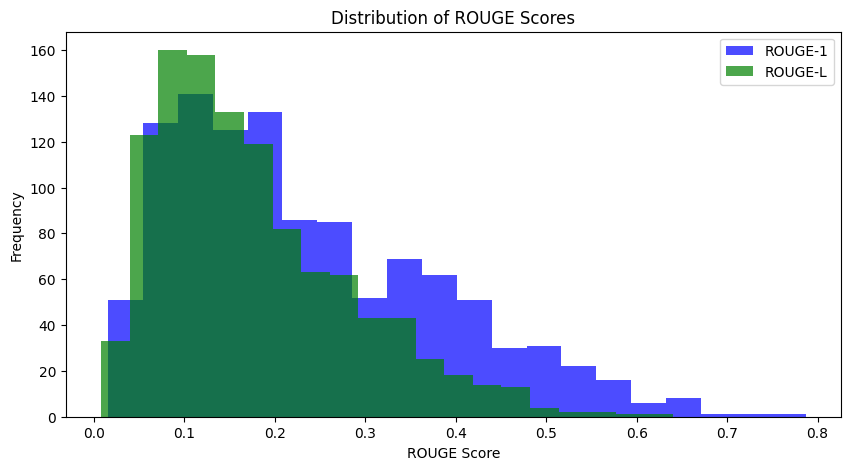

In [8]:
# Extracting Rouge scores from dictionaries
rouge1_scores = [score['rouge1'][2] for score in df['rouge_scores']]
#rouge2_scores = [score['rouge2'][2] for score in df['rouge_scores']]
rougeL_scores = [score['rougeL'][2] for score in df['rouge_scores']]

# Plotting Rouge scores
plt.figure(figsize=(10, 5))
plt.hist(rouge1_scores, bins=20, color='blue', alpha=0.7, label='ROUGE-1')
#plt.hist(rouge2_scores, bins=20, color='red', alpha=0.7, label='ROUGE-2')
plt.hist(rougeL_scores, bins=20, color='green', alpha=0.7, label='ROUGE-L')
plt.title('Distribution of ROUGE Scores')
plt.xlabel('ROUGE Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [23]:
# Compute SummaC
summa_c_scores = []
for index, row in df.iterrows():
    summary = summarizer.summarize(row['patent document'], ratio=0.2)  # Adjust ratio as needed
    # Implement compute_summa_c function if needed
    summa_c_scores.append  # Placeholder value

df['summa_c_scores'] = summa_c_scores

ValueError: Length of values (0) does not match length of index (1099)

In [ ]:
# Plotting SummaC scores
plt.figure(figsize=(10, 5))
plt.hist(df['summa_c_scores'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of SummaC Scores')
plt.xlabel('SummaC Score')
plt.ylabel('Frequency')
plt.show()

# **BERT SCORE**

In [16]:
!pip install --upgrade transformers

In [17]:
# Fit the TF-IDF vectorizer on the entire corpus of text data
corpus = df['preprocessed_patent'].tolist() + df['preprocessed_summary'].tolist()
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)

# Implement BERT score calculation
bert_scores = []
for index, row in df.iterrows():
    _, _, f1 = score([row['preprocessed_patent']], [row['preprocessed_summary']], lang='en')  # Specify the language as 'en' (English)
    bert_scores.append(f1.item())  # Assuming you're interested in F1 score

df['bert_scores'] = bert_scores

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['ro

In [ ]:
# Now use BERT model to compare the two rows: Patent Document and Patent Summary
def calculate_bert_score(document, summary):
    _, _, bert_scores = score([summary], [document], lang='en', verbose=False)
    return bert_scores.mean().item()

# Calculate BERT scores for each row
bert_scores = []
for index, row in df.iterrows():
    bert_score = calculate_bert_score(row['preprocessed_patent'], row['preprocessed_summary'])
    bert_scores.append(bert_score)

# Assign BERT scores to DataFrame
df['bert_scores'] = bert_scores

# Display DataFrame with BERT scores
print(df)

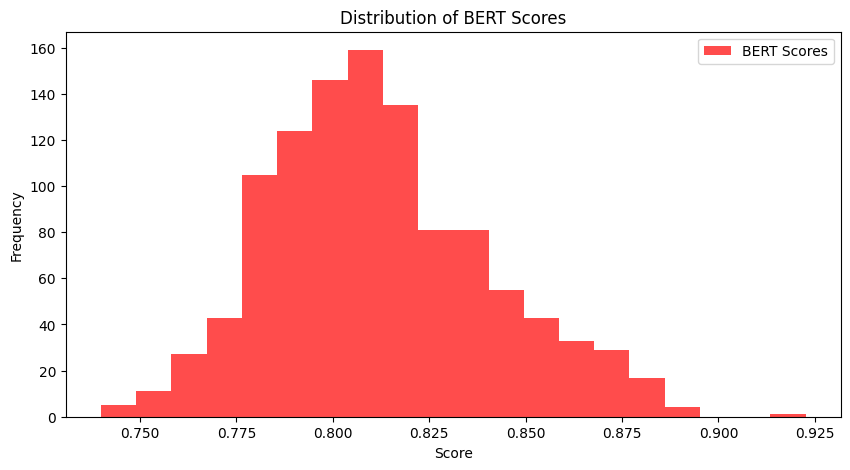

In [21]:
# Plotting BERT scores
plt.figure(figsize=(10, 5))
plt.hist(df['bert_scores'], bins=20, color='red', alpha=0.7, label='BERT Scores')
plt.title('Distribution of BERT Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# **BLEU SCORE**

In [10]:
# Compute BLEU score
bleu_scores = []
for index, row in df.iterrows():
    candidate = row['preprocessed_summary'].split()
    reference = row['preprocessed_patent'].split()
    bleu = sentence_bleu([reference], candidate)
    bleu_scores.append(bleu)

df['bleu_scores'] = bleu_scores

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

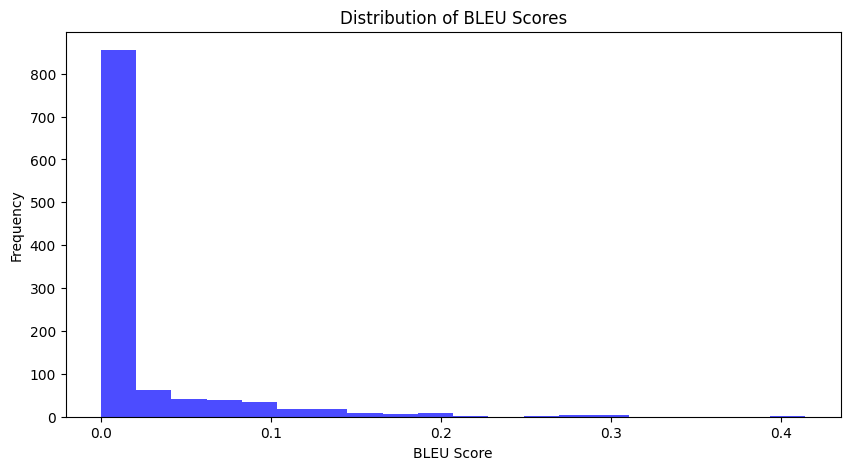

In [11]:
# Plotting BLEU scores
plt.figure(figsize=(10, 5))
plt.hist(df['bleu_scores'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of BLEU Scores')
plt.xlabel('BLEU Score')
plt.ylabel('Frequency')
plt.show()

# **METEOR SCORE**

In [12]:
# Compute METEOR score
meteor_scores = []
for index, row in df.iterrows():
    hypothesis_tokens = word_tokenize(row['preprocessed_summary'])
    reference_tokens = word_tokenize(row['preprocessed_patent'])
    meteor = single_meteor_score(reference_tokens, hypothesis_tokens)
    meteor_scores.append(meteor)

df['meteor_scores'] = meteor_scores

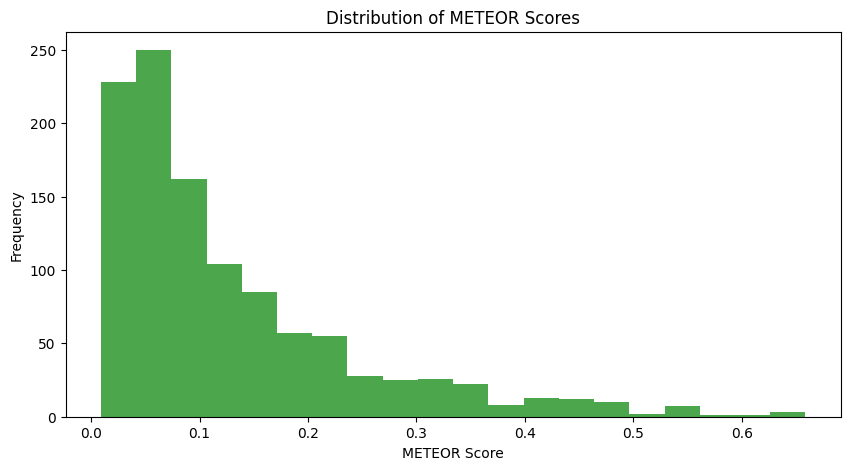

In [13]:
# Plotting METEOR scores
plt.figure(figsize=(10, 5))
plt.hist(df['meteor_scores'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of METEOR Scores')
plt.xlabel('METEOR Score')
plt.ylabel('Frequency')
plt.show()

# **COSINE SIMILARITY**

In [14]:
# Fit the TF-IDF vectorizer on the entire corpus of text data
corpus = df['preprocessed_patent'].tolist() + df['preprocessed_summary'].tolist()
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)

# Define text_to_vector function using the fitted TF-IDF vectorizer
def text_to_vector(text):
    vector = vectorizer.transform([text])
    return vector.toarray()[0]

# Compute cosine similarity
cosine_similarities = []
for index, row in df.iterrows():
    candidate = row['preprocessed_summary']
    reference = row['preprocessed_patent']
    candidate_vector = text_to_vector(candidate)
    reference_vector = text_to_vector(reference)
    cosine_sim = cosine_similarity([candidate_vector], [reference_vector])[0][0]
    cosine_similarities.append(cosine_sim)

df['cosine_similarity'] = cosine_similarities

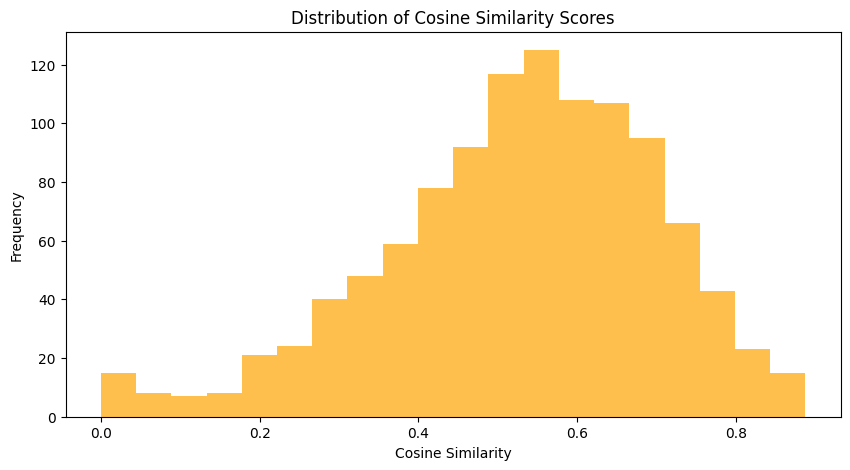

In [15]:
# Plotting cosine similarity scores
plt.figure(figsize=(10, 5))
plt.hist(df['cosine_similarity'], bins=20, color='orange', alpha=0.7)
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()

# **SUMAC SCORE**

In [ ]:
#differen code trying to get summac score
# Define weights for each score
weights = {
    'rouge1': 0.3,
    'rouge2': 0.3,
    'bleu': 0.2,
    'meteor': 0.1,
    'cosine_similarity': 0.1
}

# Compute the individual scores as before
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2'], use_stemmer=True)
rouge1_scores = []
rouge2_scores = []
for index, row in df.iterrows():
    rouge = scorer.score(row['preprocessed_patent'], row['preprocessed_summary'])
    rouge1_scores.append(rouge['rouge1'][2])
    rouge2_scores.append(rouge['rouge2'][2])

df['rouge1_scores'] = rouge1_scores
df['rouge2_scores'] = rouge2_scores

bleu_scores = []
for index, row in df.iterrows():
    candidate = row['preprocessed_summary'].split()
    reference = row['preprocessed_patent'].split()
    bleu = sentence_bleu([reference], candidate)
    bleu_scores.append(bleu)

df['bleu_scores'] = bleu_scores

meteor_scores = []
for index, row in df.iterrows():
    hypothesis_tokens = word_tokenize(row['preprocessed_summary'])
    reference_tokens = word_tokenize(row['preprocessed_patent'])
    meteor = single_meteor_score(reference_tokens, hypothesis_tokens)
    meteor_scores.append(meteor)

df['meteor_scores'] = meteor_scores

# Fit the TF-IDF vectorizer on the entire corpus of text data
corpus = df['preprocessed_patent'].tolist() + df['preprocessed_summary'].tolist()
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)

# Define text_to_vector function using the fitted TF-IDF vectorizer
def text_to_vector(text):
    vector = vectorizer.transform([text])
    return vector.toarray()[0]

# Compute cosine similarity
cosine_similarities = []
for index, row in df.iterrows():
    candidate = row['preprocessed_summary']
    reference = row['preprocessed_patent']
    candidate_vector = text_to_vector(candidate)
    reference_vector = text_to_vector(reference)
    cosine_sim = cosine_similarity([candidate_vector], [reference_vector])[0][0]
    cosine_similarities.append(cosine_sim)

df['cosine_similarity'] = cosine_similarities

# Combine scores to calculate SummaC score
summac_scores = []
for index, row in df.iterrows():
    summac_score = (
        weights['rouge1'] * row['rouge1_scores'] +
        weights['rouge2'] * row['rouge2_scores'] +
        weights['bleu'] * row['bleu_scores'] +
        weights['meteor'] * row['meteor_scores'] +
        weights['cosine_similarity'] * row['cosine_similarity']
    )
    summac_scores.append(summac_score)

df['summac_scores'] = summac_scores

In [ ]:
print(df['summac_scores'])

In [ ]:
# Plotting SummaC scores
plt.figure(figsize=(10, 5))
plt.hist(df['summa_c_scores'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of SummaC Scores')
plt.xlabel('SummaC Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Print out individual scores and SummaC scores for each model
for index, row in df.iterrows():
    print("Model:", index)  # Use index as model name
    print("ROUGE-1 Score:", row['rouge1_scores'])
    print("ROUGE-2 Score:", row['rouge2_scores'])
    print("BLEU Score:", row['bleu_scores'])
    print("METEOR Score:", row['meteor_scores'])
    print("Cosine Similarity Score:", row['cosine_similarity'])
    print("SummaC Score:", row['summac_scores'])
    print("\n")

In [ ]:
# Visualize individual scores and SummaC scores
plt.figure(figsize=(12, 8))

# Plot individual scores with error bars
plt.errorbar(df.index, df['rouge1_scores'], yerr=np.std(df['rouge1_scores']), label='ROUGE-1', marker='o', capsize=5)
plt.errorbar(df.index, df['rouge2_scores'], yerr=np.std(df['rouge2_scores']), label='ROUGE-2', marker='o', capsize=5)
plt.errorbar(df.index, df['bleu_scores'], yerr=np.std(df['bleu_scores']), label='BLEU', marker='o', capsize=5)
plt.errorbar(df.index, df['meteor_scores'], yerr=np.std(df['meteor_scores']), label='METEOR', marker='o', capsize=5)
plt.errorbar(df.index, df['cosine_similarity'], yerr=np.std(df['cosine_similarity']), label='Cosine Similarity', marker='o', capsize=5)

# Plot SummaC scores
plt.errorbar(df.index, df['summac_scores'], yerr=np.std(df['summac_scores']), label='SummaC', color='black', linewidth=2, linestyle='--', capsize=5)

plt.xlabel('Model Name')
plt.ylabel('Scores')
plt.title('Individual Scores and SummaC Scores for Different Models')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Plot SummaC scores
plt.plot(df.index, df['summac_scores'], label='SummaC', color='black', linewidth=2, linestyle='--')

plt.xlabel('Model Name')
plt.ylabel('Scores')
plt.title('Individual Scores and SummaC Scores for Different Models')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()